In [9]:
import pandas as pd
import numpy as np
from scipy import stats as stats

try:
    from tabulate import tabulate
except NameError:
    pass

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [139]:
data = pd.read_csv('./data.csv', sep = ';').dropna().set_index(['Grupo', 'i'])

In [234]:
def gen_descriptive_stats(data, name):
    if len(data.shape) == 1: # it's pd.Series
        data = data.to_frame()
    descriptive_stats = data.describe().T
    descriptive_stats['amplitude'] = descriptive_stats['max'] - descriptive_stats['min']
    for measure in data.columns:
        descriptive_stats.loc[measure, 'mode'] = data[measure].mode()[0]
        descriptive_stats.loc[measure, 'trim_mean 80%'] = stats.trim_mean(data[measure], 0.1)
        descriptive_stats.loc[measure, 'median'] = data[measure].median()
        descriptive_stats.loc[measure, 'variance'] = data[measure].var()
        descriptive_stats.loc[measure, 'variation coeff'] = stats.variation(data[measure])
        descriptive_stats.loc[measure, 'interquartile'] = stats.iqr(data[measure])
        descriptive_stats.loc[measure, 'skewness'] = data[measure].skew()
        descriptive_stats.loc[measure, 'kurtosis'] = data[measure].kurtosis()
    try:
        descriptive_stats_file = open(f'{name}_descriptive_stats.txt', 'w')
        descriptive_stats_file.write(tabulate(descriptive_stats, descriptive_stats.T.columns, tablefmt='latex'))
        descriptive_stats_file.close()
        np.savetxt(f"{name}_descriptive_stats_np.txt", descriptive_stats.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
    except NameError:
        np.savetxt(f"{name}_descriptive_stats_np.txt", descriptive_stats.T.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
    return descriptive_stats.T

### If we group all the diameters measures

In [235]:
diam = data['d1'].append(data['d2']).append(data['d3']).append(data['d4']).reset_index(drop = True)
gen_descriptive_stats(diam, 'diam')

,0
count,120.000000
mean,21.714083
std,1.751403
min,16.400000
25%,20.900000
50%,21.710000
75%,23.000000
max,24.640000
amplitude,8.240000
mode,23.000000


## Estudando dados qualitativos

In [54]:
qualitative = pd.read_csv('./qualitative_data.csv', sep = ';').set_index(['Grupo', 'i'])

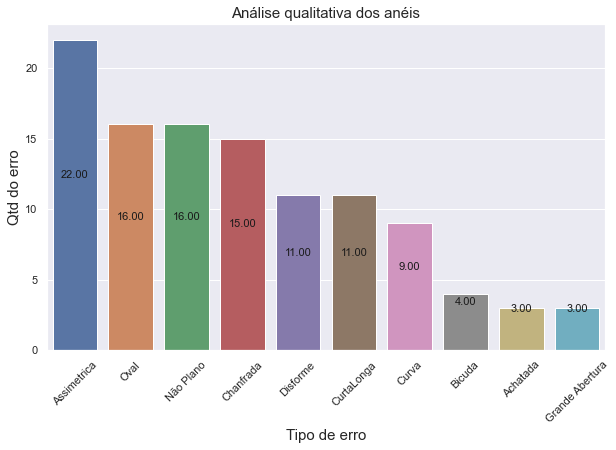

In [236]:
plt.figure(figsize = (10,6))
sns.set_style("darkgrid")
ax = sns.barplot(x='index', y=0, data=qualitative.sum().to_frame().reset_index().sort_values([0], ascending = False))
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Tipo de erro', fontsize=15)
ax.set_ylabel('Qtd do erro', fontsize=15)
ax.set_title('Análise qualitativa dos anéis', fontsize=15)

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()/2),
                 ha='center', va='center', fontsize=11, color='k', xytext=(0, 20),
                 textcoords='offset points')
        
plt.savefig('tipo_erros.png', dpi=500)

In [99]:
contingencia = qualitative.groupby(['Grupo']).sum()
try:
    contingencia_file = open('contingencia.txt', 'w')
    contingencia_file.write(tabulate(contingencia.T, contingencia.T.columns, tablefmt='latex'))
    contingencia_file.close()
    np.savetxt("contingencia_np.txt", contingencia.T.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
except NameError:
    np.savetxt("contingencia_np.txt", contingencia.T.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')

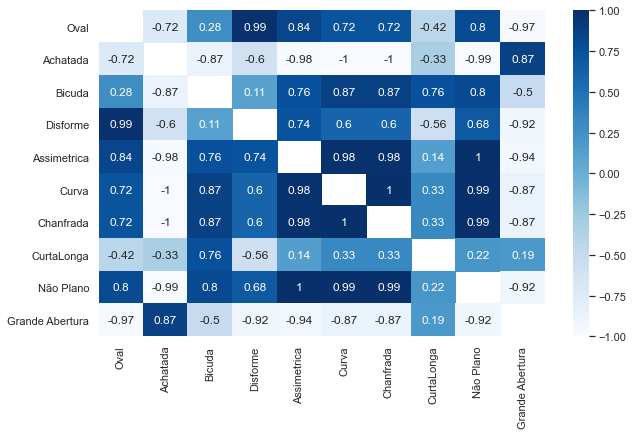

In [237]:
corr_contingencia = contingencia.corr()
for i in range(corr_contingencia.shape[0]):
    corr_contingencia.iloc[i,i] = None

plt.figure(figsize = (10,6))
sns.set(style = 'white')
ax = sns.heatmap(corr_contingencia, cmap = "Blues", annot = True)
plt.savefig('corr_contingencia.png', dpi=500)

## Diagramas de pontos e de ramos e folhas

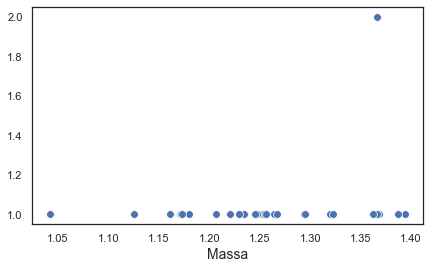

<Figure size 432x288 with 0 Axes>

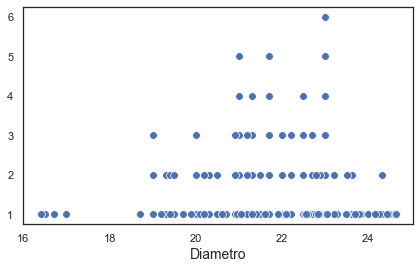

<Figure size 432x288 with 0 Axes>

In [183]:
massa = data['m'].to_frame()
diam = data['d1'].append(data['d2']).append(data['d3']).append(data['d4']).reset_index(drop = True)
diam = diam.to_frame()
diam.columns = ['diam']

dummy = []

for index, qtd in enumerate(massa['m']):
    subset = massa.iloc[:index + 1]  # Create subset starting at the beginning of dataset until the movie itself
    count = len(subset[subset['m'] == qtd])  # Count all movies from the same year in this subset
    dummy.append(count)  # Appended counts will be used as vertical values in the scatterplot,
    # which will help to create a dot plot

# Data for the plot
x = massa['m']
y = dummy

# Dot plot created using scatter plot
plt.figure(figsize=(7, 4))
ax = sns.scatterplot(x, y, s=60, legend="full", palette="RdYlGn")
plt.xlabel("Massa", size=14)
plt.show()
plt.savefig('dotplot_massa.png', dpi=500)

dummy = []

for index, qtd in enumerate(diam['diam']):
    subset = diam.iloc[:index + 1]  # Create subset starting at the beginning of dataset until the movie itself
    count = len(subset[subset['diam'] == qtd])  # Count all movies from the same year in this subset
    dummy.append(count)  # Appended counts will be used as vertical values in the scatterplot,
    # which will help to create a dot plot

# Data for the plot
x = diam['diam']
y = dummy

# Dot plot created using scatter plot
plt.figure(figsize=(7, 4))
ax = sns.scatterplot(x, y, s=60, legend="full", palette="RdYlGn")
plt.xlabel("Diametro", size=14)
plt.show()
plt.savefig('dotplot_diametro.png', dpi=500)

## Boxplots de massa e diametro de novo

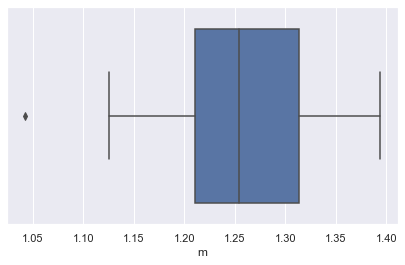

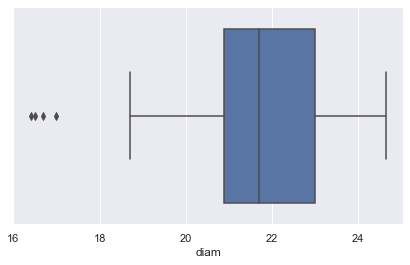

In [210]:
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

sns.boxplot(x = massa['m'])
plt.savefig('boxplot_massa.png', dpi=500)

plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

sns.boxplot(x = diam['diam'])
plt.savefig('boxplot_diametro.png', dpi=500)

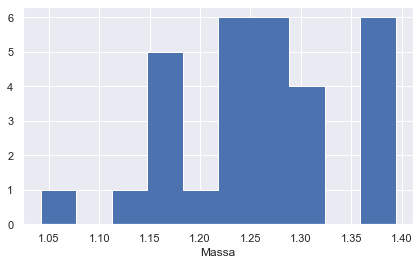

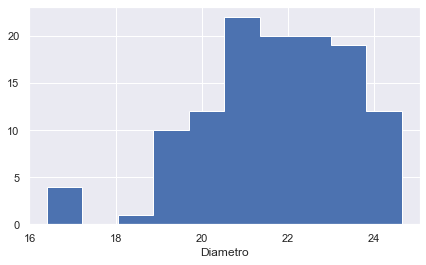

In [220]:
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

plt.hist(massa['m'], histtype = 'stepfilled')
plt.xlabel('Massa')
plt.savefig('hist_massa.png', dpi=500)
plt.show()

plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

plt.hist(diam['diam'], histtype = 'stepfilled')
plt.xlabel('Diametro')
plt.savefig('hist_diametro.png', dpi=500)
plt.show()

In [221]:
def mean_confidence_interval(data, confidence=0.95):
#     print(data)
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return [m, m-h, m+h]

In [230]:
ci_massa = (sorted(mean_confidence_interval(massa['m'].values)))
ci_diam = sorted(mean_confidence_interval(diam['diam'].values))
np.savetxt("ci_massa.txt", ci_massa, delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
np.savetxt("ci_diam.txt", ci_diam, delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')